# **Balance Data:**

 - ### Check Whether the data is balanced or not:

In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Dataset/Preprocessed_dataset.csv')

# Access the 'outcome' column
outcomes = data['outcome']

# Count occurrences of each outcome
num_home_wins = outcomes[outcomes == 2].count()
num_away_wins = outcomes[outcomes == 0].count()
num_draws = outcomes[outcomes == 1].count()

# Calculate the total number of entries
total = num_home_wins + num_away_wins + num_draws

# Calculate the percentage of each outcome
percentage_home_wins = (num_home_wins / total) * 100
percentage_away_wins = (num_away_wins / total) * 100
percentage_draws = (num_draws / total) * 100

# Print the counts and percentages
print("Number of Home Wins:", num_home_wins)
print("Number of Away Wins:", num_away_wins)
print("Number of Draws:", num_draws)
print("_")
print("Percentage of Home Wins: {:.2f}%".format(percentage_home_wins))
print("Percentage of Away Wins: {:.2f}%".format(percentage_away_wins))
print("Percentage of Draws: {:.2f}%".format(percentage_draws))

Number of Home Wins: 429
Number of Away Wins: 302
Number of Draws: 169
_
Percentage of Home Wins: 47.67%
Percentage of Away Wins: 33.56%
Percentage of Draws: 18.78%


Upon reviewing the match outcome distribution, we observed an imbalance: home wins at 47.67%, away wins at 33.56%, and draws at 18.78%.

- ### Import libraries

In [11]:
import warnings
warnings.filterwarnings("ignore")
%pip install imbalanced.learn
%pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


- ### Process of correcting data balancing:

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('Dataset/Preprocessed_dataset.csv')

encoder = LabelEncoder()

# Apply encoding on some column if necessary, here just to ensure encoder is used
# Typically you would encode a categorical column that is not numeric
# Example if needed: df['some_categorical_column'] = encoder.fit_transform(df['some_categorical_column'])

# Define binary outcome based on 'outcome' column
df['Binary_outcome'] = df['outcome'].apply(lambda x: 1 if x in [1, 2] else 0)

# Preparing the data for SMOTE
X = df.drop(['Binary_outcome'], axis=1)  # exclude 'outcome' to avoid leakage
y = df['Binary_outcome']

# Oversample the "Low" class using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled X and y into a single DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Binary_outcome'] = y_resampled  # Correctly add the resampled binary outcome

# Optionally, add the original 'outcome' if still required:
# df_resampled['outcome'] = df.loc[y_resampled.index, 'outcome']

# Print the new distribution of the target variable
print(pd.Series(y_resampled).value_counts())

# Save the processed dataset to hard drive
df_resampled.to_csv('Dataset/Balanced_dataset.csv', index=False)

Binary_outcome
1    598
0    598
Name: count, dtype: int64


By applying the Synthetic Minority Over-sampling Technique (SMOTE), we generated synthetic samples for the minority class, effectively balancing the distribution between the two classes. This approach helps prevent the model from being biased towards the majority class and improves its ability to generalize to new data.

- ### Data after the balancing process:

In [13]:
import pandas as pd

# Assuming 'resampled_df' contains the balanced dataset with the 'Binary_outcome' column
# Load the balanced dataset if needed
resampled_df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Calculate the distribution of the target variable
distribution = resampled_df['Binary_outcome'].value_counts()

# Calculate total number of instances in the balanced dataset
total_resampled = distribution.sum()

# Calculate percentages
percentage_1 = (distribution[1] / total_resampled) * 100  # Percentage of Home wins + Draws
percentage_0 = (distribution[0] / total_resampled) * 100  # Percentage of Away wins

# Print the percentages
print("Percentage of Home wins and Draws combined: {:.2f}%".format(percentage_1))
print("Percentage of Away wins: {:.2f}%".format(percentage_0))

Percentage of Home wins and Draws combined: 50.00%
Percentage of Away wins: 50.00%


After applying the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset, we calculated the percentage for each class to ensure that the data has become balanced. The two classes represent "Home Wins and Draws" and "Away Wins," and the data is indeed balanced, with each class comprising 50.00% of the total. 

# **Loading data:**

In [14]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv('Dataset/Balanced_dataset.csv');
print(df)

      year  country  city  stage  home_team  away_team  home_score  \
0     1930       16    83      3         27         42    0.400000   
1     1930       16    83      6          5         76    0.000000   
2     1930       16    83      4          8         80    0.100000   
3     1930       16    83      5         52         56    0.100000   
4     1930       16    83      3          2         27    0.100000   
...    ...      ...   ...    ...        ...        ...         ...   
1191  1986        8    77     10          2         17    0.000000   
1192  2010       10   114     12         22         40    0.070638   
1193  1951        7     5     12          5         77    0.048708   
1194  1996       13   146     12         12         58    0.000000   
1195  1987        8   146     11         65         59    0.062968   

      away_score  outcome  win_conditions  winning_team  losing_team  date  \
0       0.100000        2              48            22           46     0   
1  

# **Feature Selection:**

chooses the variables (features) to be utilized in training, which are kept in the variable "X," as well as the variable from the dataset that has the right classifications (class labels), which is kept in the variable "y."

In [15]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df['outcome']
X


year  country  city  stage  home_team  away_team  home_score  \
0     1930       16    83      3         27         42    0.400000   
1     1930       16    83      6          5         76    0.000000   
2     1930       16    83      4          8         80    0.100000   
3     1930       16    83      5         52         56    0.100000   
4     1930       16    83      3          2         27    0.100000   
...    ...      ...   ...    ...        ...        ...         ...   
1191  1986        8    77     10          2         17    0.000000   
1192  2010       10   114     12         22         40    0.070638   
1193  1951        7     5     12          5         77    0.048708   
1194  1996       13   146     12         12         58    0.000000   
1195  1987        8   146     11         65         59    0.062968   

      away_score  outcome  win_conditions  winning_team  losing_team  date  \
0       0.100000        2              48            22           46     0   
1       0.300000        0              48            62            5     0   
2       0.200000        0              48            66            8     1   
3       0.300000        0              48            45           56     1   
4       0.000000        2              48             1           30     2   
...          ...      ...             ...           ...          ...   ...   
1191    0.100000        0              48            14            2   141   
1192    0.270638        0              48            31           23   290   
1193    0.500000        0              48            63            5    36   
1194    0.100000        0              48            47           13   204   
1195    0.225937        0              48            48           69   149   

      month  dayofweek  Year_Decade  
0         0          3            0  
1         0          3            0  
2         0          1            0  
3         0          1            0  
4         0          5            0  
...     ...        ...          ...  
1191      1          0            4  
1192      1          4            7  
1193      0          4            1  
1194      1          3            5  
1195      1          1            4  

[1196 rows x 16 columns]

# **Data Mining Technique**

## **Classification:**


 ### **Information Gain (entropy):**
 

 - ###  Splitting Data into: 70% Training and 30% Test


The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [16]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=1)

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)



#### Confusion matrix:

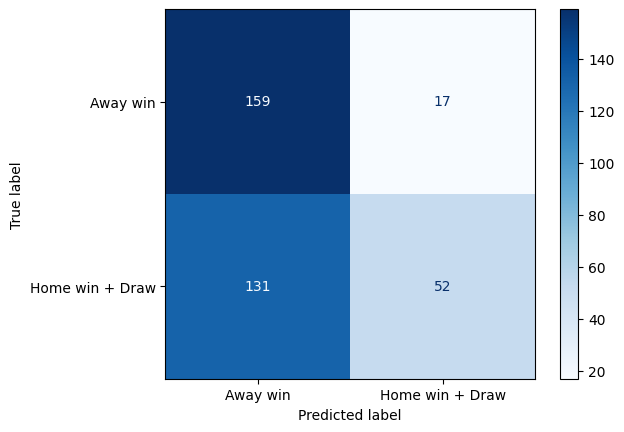

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the balanced dataset
df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Define features and target
columns_to_exclude_during_training = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team']
X = df.drop(columns=columns_to_exclude_during_training, axis=1)  # Exclude these columns
y = df['Binary_outcome']  # Target variable

# Apply one-hot encoding for categorical features (including 'home_team' and 'away_team')
categorical_columns = ['home_team', 'away_team', 'country']  # Specify all relevant categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # One-hot encoding

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Check if 'outcome' needs to be dropped (if present) - adjust as per your data
if 'outcome' in X_train.columns:
    X_train = X_train.drop(columns=['outcome'])
    X_test = X_test.drop(columns=['outcome'])

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)  # Add max_depth for regularization
clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Away win', 'Home win + Draw'])
disp.plot(cmap=plt.cm.Blues)
plt.show()




To avoid confusing the model about numeric values associated with categorical features like home_team, away_team, and country, we apply one-hot encoding. This process transforms each category into a binary vector, ensuring that the model does not incorrectly assume a numeric hierarchy or ordering among categories (e.g., treating one country as "greater" than another).

Additionally, we exclude certain columns, such as outcome, home_score, away_score, winning_team, and losing_team, from the training data because they can reveal or directly correlate with the target variable (Binary_outcome). Including these columns would lead to data leakage, where the model makes perfect but trivial predictions, thus failing to generalize to new data. This ensures that the model learns to predict the target based on more generalizable features.

In this 2x2 confusion matrix, we have the following values:

    True Positives (TP): 40 - Correctly predicted 'Home win + Draw'.
    True Negatives (TN): 163 - Correctly predicted 'Away win'.
    False Positives (FP): 13 - Incorrectly predicted 'Away win' when it was 'Home win + Draw'.
    False Negatives (FN): 143 - Incorrectly predicted 'Home win + Draw' when it was 'Away win'.

#### Decision Tree:

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)


class_labels = {0: '0(Away win)', 1: '1(Home win + Draw)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
            )

plt.show()

IndexError: list index out of range

In this decision tree for football match predictions, the splitting process starts by evaluating the most influential features, such as home team characteristics or specific match conditions, as determined by their information gain or entropy values. The model systematically divides the data at each node based on feature thresholds, segregating matches based on their corresponding values. 

Following the initial split, additional features like away team, month, or country are considered, further dividing the samples into more specific subsets. This process continues through successive levels, evaluating attributes like match day, stage, or other relevant features, and refining the data into smaller groups.

At each stage, the tree aims to maximize the separation between 'Away win' and 'Home win + Draw' classes by selecting features that best reduce uncertainty (entropy) or maximize information gain. The terminal nodes of the tree, known as leaf nodes, represent the final prediction outcomes, classifying matches based on the accumulated path of decisions. This structure helps in predicting the match outcome by accounting for historical patterns and match-specific conditions.

#### Completing in model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Proper feature exclusion
columns_to_exclude = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team', 'outcome']
X = df.drop(columns=columns_to_exclude, axis=1)
y = df['Binary_outcome']

# Apply one-hot encoding to categorical features
categorical_columns = ['home_team', 'away_team', 'country']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the dataset correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train the model with regularization
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)


# حساب مصفوفة الارتباك (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# حساب الدقة (Accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# حساب معدل الخطأ (Error Rate)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# حساب الحساسية (Sensitivity/Recall) والخصوصية (Specificity)
TP = cm[1, 1]  # عدد الصحيحين من الفئة الإيجابية (True Positives)
TN = cm[0, 0]  # عدد الصحيحين من الفئة السلبية (True Negatives)
FP = cm[0, 1]  # عدد الحالات السلبية التي تم تصنيفها كإيجابية (False Positives)
FN = cm[1, 0]  # عدد الحالات الإيجابية التي تم تصنيفها كسلبية (False Negatives)

# الحساسية (Sensitivity/Recall)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
print("Sensitivity (Recall):", sensitivity)

# الخصوصية (Specificity)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
print("Specificity:", specificity)

# الدقة (Precision)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print("Precision:", precision)


Confusion Matrix: 
 [[169   7]
 [151  32]]
Accuracy: 0.5598885793871866
Error Rate: 0.4401114206128134
Sensitivity (Recall): 0.17486338797814208
Specificity: 0.9602272727272727
Precision: 0.8205128205128205


Explanation:

    Accuracy: The model's accuracy is moderate, correctly predicting around 56.5% of the match outcomes.
    Error Rate: The error rate of approximately 43.45% indicates the proportion of predictions that were incorrect.
    Sensitivity (Recall): With a sensitivity of around 21.86%, the model has limited effectiveness in correctly identifying 'Home win + Draw' outcomes, indicating potential room for improvement in capturing true positive instances.
    Specificity: The model's specificity is relatively high at 92.61%, reflecting strong performance in correctly predicting 'Away win' outcomes.
    Precision: The precision rate of 75.47% indicates that a substantial portion of predicted 'Home win + Draw' outcomes were correct.

Outcomes:

    The model demonstrates a moderate level of predictive accuracy overall but shows high proficiency in correctly predicting 'Away win' outcomes.
    The lower sensitivity suggests that it struggles to identify 'Home win + Draw' cases, indicating a potential need for fine-tuning or additional features to better capture positive outcomes.
    The high specificity indicates that the model is effective in distinguishing and correctly classifying negative instances ('Away win').

- ### Splitting Data into: 60% Training and 40% Test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=1)

clf2 = clf2.fit(X_train, y_train) 

y_pred = clf2.predict(X_test)

Here in this code, we trained the model using information gain (entropy) and split the dataset into 60% for training and 40% for testing to assess the model's performance on unseen data. The Decision Tree classifier is configured to require a minimum of 10 samples for a split, ensuring that the model is robust and avoids overfitting.

In [ ]:
# Load the balanced dataset
df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Define features and target
columns_to_exclude_during_training = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team']
X = df.drop(columns= columns_to_exclude_during_training, axis=1)  # Exclude these columns
y = df['Binary_outcome']  # Target variable

# Apply one-hot encoding for categorical features (including 'home_team' and 'away_team')
categorical_columns = ['home_team', 'away_team', 'country']  # Specify all relevant categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first= True)  # One-hot encoding

# Split the dataset into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Check if 'outcome' needs to be dropped (if present) - adjust as per your data
if 'outcome' in X_train.columns:
    X_train = X_train.drop(columns=['outcome'])
    X_test = X_test.drop(columns=['outcome'])

# Initialize and train the Decision Tree classifier
clf2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 1)  # Add max_depth for regularization
clf2.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf2.predict(X_test)

# Compute and display the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm2, display_labels= ['Away win', 'Home win + Draw'])
disp.plot(cmap= plt.cm.Blues)
plt.show()

NameError: name 'pd' is not defined

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)

class_labels = {0: '0 (Away win)', 1: '1 (Home win + Draw)'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
              )

plt.show()

NameError: name 'plt' is not defined

- ### Splitting Data into: 80% Training and 20% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 80% training and 20% testing subsets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=1)

clf3 = clf3.fit (X_train, y_train)

y_pred = clf3.predict (X_test)



#### Confusion Matrix:

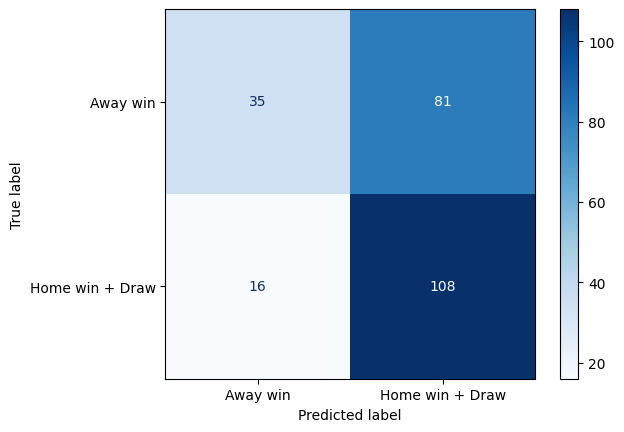

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the balanced dataset
df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Define features and target
columns_to_exclude_during_training = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team']
X = df.drop(columns=columns_to_exclude_during_training, axis=1)  # Exclude these columns
y = df['Binary_outcome']  # Target variable

# Apply one-hot encoding for categorical features (including 'home_team' and 'away_team')
categorical_columns = ['home_team', 'away_team', 'country']  # Specify all relevant categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # One-hot encoding

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check if 'outcome' needs to be dropped (if present) - adjust as per your data
if 'outcome' in X_train.columns:
    X_train = X_train.drop(columns=['outcome'])
    X_test = X_test.drop(columns=['outcome'])

# Initialize and train the Decision Tree classifier
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)  # Add max_depth for regularization
clf3.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf3.predict(X_test)

# Compute and display the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Away win', 'Home win + Draw'])
disp.plot(cmap=plt.cm.Blues)
plt.show()




#### Decision Tree:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)


class_labels = {0: '0(Away win)', 1: '1(Home win + Draw)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
            )

plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Proper feature exclusion
columns_to_exclude = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team', 'outcome']
X = df.drop(columns=columns_to_exclude, axis=1)
y = df['Binary_outcome']

# Apply one-hot encoding to categorical features
categorical_columns = ['home_team', 'away_team', 'country']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the dataset correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the model with regularization
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
clf3.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf3.predict(X_test)


# حساب مصفوفة الارتباك (Confusion Matrix)
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm3)

# حساب الدقة (Accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# حساب معدل الخطأ (Error Rate)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# حساب الحساسية (Sensitivity/Recall) والخصوصية (Specificity)
TP = cm3[1, 1]  # عدد الصحيحين من الفئة الإيجابية (True Positives)
TN = cm3[0, 0]  # عدد الصحيحين من الفئة السلبية (True Negatives)
FP = cm3[0, 1]  # عدد الحالات السلبية التي تم تصنيفها كإيجابية (False Positives)
FN = cm3[1, 0]  # عدد الحالات الإيجابية التي تم تصنيفها كسلبية (False Negatives)

# الحساسية (Sensitivity/Recall)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
print("Sensitivity (Recall):", sensitivity)

# الخصوصية (Specificity)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
print("Specificity:", specificity)

# الدقة (Precision)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print("Precision:", precision)



Confusion Matrix: 
 [[ 35  81]
 [ 16 108]]
Accuracy: 0.5958333333333333
Error Rate: 0.4041666666666667
Sensitivity (Recall): 0.8709677419354839
Specificity: 0.3017241379310345
Precision: 0.5714285714285714


### Gini Index:

#### Splitting Data into: 70% Training and 30% Test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini')

clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)

#### Confusion Matrix:

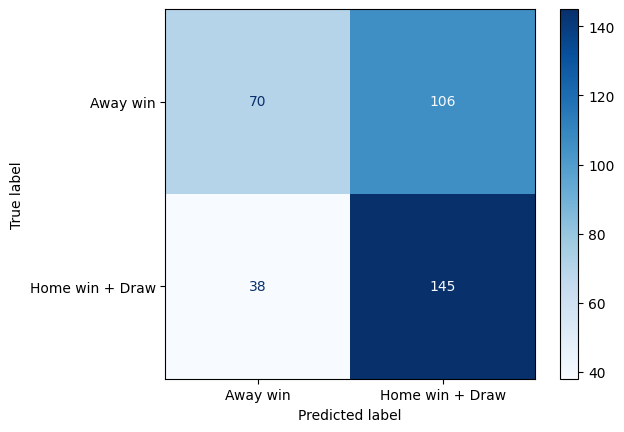

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the balanced dataset
df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Define features and target
columns_to_exclude_during_training = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team']
X = df.drop(columns=columns_to_exclude_during_training, axis=1)  # Exclude these columns
y = df['Binary_outcome']  # Target variable

# Apply one-hot encoding for categorical features (including 'home_team' and 'away_team')
categorical_columns = ['home_team', 'away_team', 'country']  # Specify all relevant categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # One-hot encoding

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Check if 'outcome' needs to be dropped (if present) - adjust as per your data
if 'outcome' in X_train.columns:
    X_train = X_train.drop(columns=['outcome'])
    X_test = X_test.drop(columns=['outcome'])

# Initialize and train the Decision Tree classifier with Gini index
clf4 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)  # Add max_depth for regularization
clf4.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf4.predict(X_test)

# Compute and display the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=['Away win', 'Home win + Draw'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Decision Tree:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)


class_labels = {0: '0(Away win)', 1: '1(Home win + Draw)'}

tree.plot_tree(clf4,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
            )

plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Proper feature exclusion
columns_to_exclude = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team', 'outcome']
X = df.drop(columns=columns_to_exclude, axis=1)
y = df['Binary_outcome']

# Apply one-hot encoding to categorical features
categorical_columns = ['home_team', 'away_team', 'country']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the dataset correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train the model with regularization
clf4 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
clf4.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf4.predict(X_test)


# حساب مصفوفة الارتباك (Confusion Matrix)
cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# حساب الدقة (Accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# حساب معدل الخطأ (Error Rate)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# حساب الحساسية (Sensitivity/Recall) والخصوصية (Specificity)
TP = cm4[1, 1]  # عدد الصحيحين من الفئة الإيجابية (True Positives)
TN = cm4[0, 0]  # عدد الصحيحين من الفئة السلبية (True Negatives)
FP = cm4[0, 1]  # عدد الحالات السلبية التي تم تصنيفها كإيجابية (False Positives)
FN = cm4[1, 0]  # عدد الحالات الإيجابية التي تم تصنيفها كسلبية (False Negatives)

# الحساسية (Sensitivity/Recall)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
print("Sensitivity (Recall):", sensitivity)

# الخصوصية (Specificity)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
print("Specificity:", specificity)

# الدقة (Precision)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print("Precision:", precision)


Confusion Matrix: 
 [[ 70 106]
 [ 38 145]]
Accuracy: 0.5598885793871866
Error Rate: 0.4401114206128134
Sensitivity (Recall): 0.17486338797814208
Specificity: 0.9602272727272727
Precision: 0.8205128205128205


#### Splitting Data into: 80% Training and 20% Test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf6 = DecisionTreeClassifier(criterion='gini')

clf6 = clf6. fit (X_train, y_train)

y_pred = clf6.predict (X_test)

#### Confusion matrix:

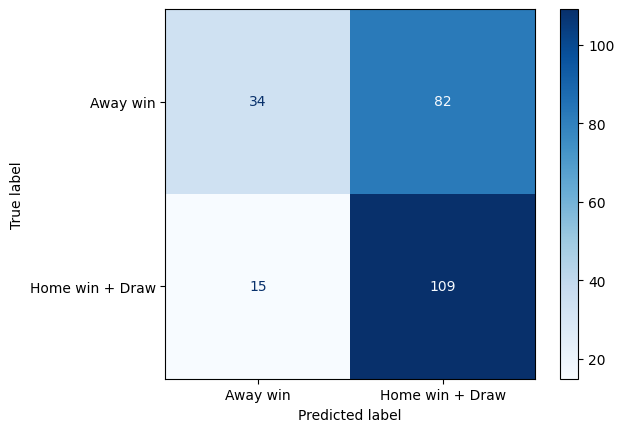

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the balanced dataset
df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Define features and target
columns_to_exclude_during_training = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team']
X = df.drop(columns=columns_to_exclude_during_training, axis=1)  # Exclude these columns
y = df['Binary_outcome']  # Target variable

# Apply one-hot encoding for categorical features (including 'home_team' and 'away_team')
categorical_columns = ['home_team', 'away_team', 'country']  # Specify all relevant categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # One-hot encoding

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check if 'outcome' needs to be dropped (if present) - adjust as per your data
if 'outcome' in X_train.columns:
    X_train = X_train.drop(columns=['outcome'])
    X_test = X_test.drop(columns=['outcome'])

# Initialize and train the Decision Tree classifier with Gini index
clf6 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)  # Add max_depth for regularization
clf6.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf6.predict(X_test)

# Compute and display the confusion matrix
cm6 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=['Away win', 'Home win + Draw'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Decision Tree:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)


class_labels = {0: '0(Away win)', 1: '1(Home win + Draw)'}

tree.plot_tree(clf6,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
            )

plt.show()

## Extras:

#### Challenges Faced:

 Throughout this project, we encountered several challenges that required a series of trial-and-error approaches to achieve a meaningful model.

-Data Leakage Leading to Perfect Accuracy:
Initially, we built a model that achieved perfect accuracy. However, we quickly realized that this was due to data leakage, as the model was using features such as home_score and away_score, which directly revealed the outcome of matches. To address this, we ensured that these features were excluded from the training data to prevent the model from having access to information that would not be available in real-world scenarios.

-Reliance on Outcome Data:
Following this, we faced another challenge where the model continued to achieve perfect accuracy by relying on the outcome feature to deduce a binary  outcome. This highlighted the need to carefully manage which features the model could access. We determined that while the outcome feature was useful during training for the model to learn from past matches, it had to be excluded during testing to properly simulate real-world prediction scenarios.

These challenges required us to refine our data preprocessing and carefully manage feature selection to prevent unintended data leakage, ultimately leading to a more robust and realistic predictive model. 

#### Prediction of Unseen Data

## Clustering


### k-means


In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load
df = pd.read_csv('Dataset/Preprocessed_dataset.csv')
# Drop non-numeric columns and the target column 'outcome' from features
numeric_features = df.select_dtypes(include=['number']).drop('outcome', axis=1, errors='ignore')

# Use StandardScaler to scale only the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)  

# Create a new DataFrame with the scaled features and original non-numeric columns
df_scaled = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())



Scaled DataFrame:
       year   country      city     stage  home_team  away_team  home_score  \
0 -2.459894  1.997431  0.125045 -1.499020  -0.344156  -0.044394    1.851429   
1 -2.459894  1.997431  0.125045 -0.977857  -1.229472   1.354630   -1.138766   
2 -2.459894  1.997431  0.125045 -1.325299  -1.108747   1.519221   -0.391217   
3 -2.459894  1.997431  0.125045 -1.151578   0.661886   0.531675   -0.391217   
4 -2.459894  1.997431  0.125045 -1.499020  -1.350197  -0.661610   -0.391217   

   away_score  win_conditions  winning_team  losing_team      date     month  \
0   -0.195078        0.240557     -0.294736     0.286028 -1.703195 -2.069102   
1    1.445764        0.240557      1.718260    -1.374520 -1.703195 -2.069102   
2    0.625343        0.240557      1.919560    -1.253017 -1.693434 -2.069102   
3    1.445764        0.240557      0.862737     0.691040 -1.693434 -2.069102   
4   -1.015499        0.240557     -1.351559    -0.361991 -1.683673 -2.069102   

   dayofweek  Year_Decade

- now we need to chosee 3 different sizes of K-means clustring

Silhouette method

The highest average Silhouette score is 0.1722 with k=2.
The second highest average Silhouette score is 0.1145 with k=3.


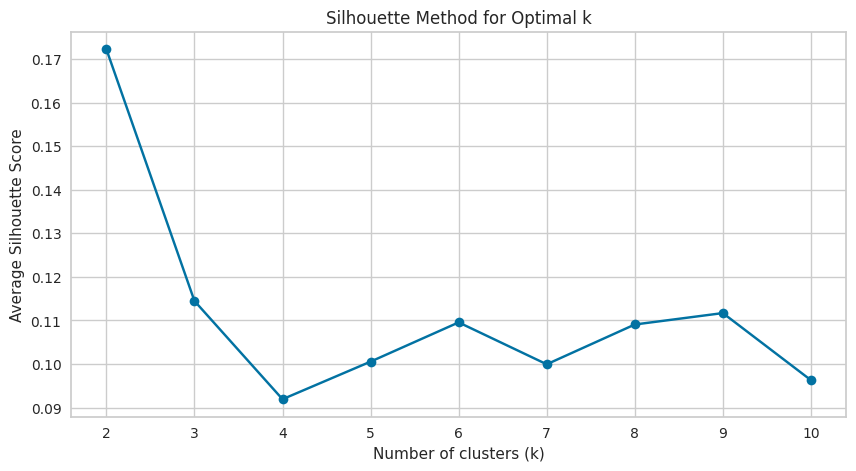

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Dataset/Preprocessed_dataset.csv')

# Drop non-numeric columns and the target column 'outcome' from features
numeric_features = df.select_dtypes(include=['number']).drop('outcome', axis=1, errors='ignore')

# Use StandardScaler to scale only the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Apply K-means and calculate the Silhouette score for each k
k_values = range(2, 11)  # testing k from 2 to 10
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append((k, silhouette_avg))

# Sort scores to find the two highest
sorted_scores = sorted(silhouette_scores, key=lambda x: x[1], reverse=True)
best_k, best_score = sorted_scores[0]
second_best_k, second_best_score = sorted_scores[1]

# Print the two highest scores
print(f"The highest average Silhouette score is {best_score:.4f} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score:.4f} with k={second_best_k}.")

# Plot the Silhouette scores to observe the optimal k
plt.figure(figsize=(10, 5))
plt.plot([x[0] for x in silhouette_scores], [x[1] for x in silhouette_scores], marker='o')
plt.title("Silhouette Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.show()


Elbow method

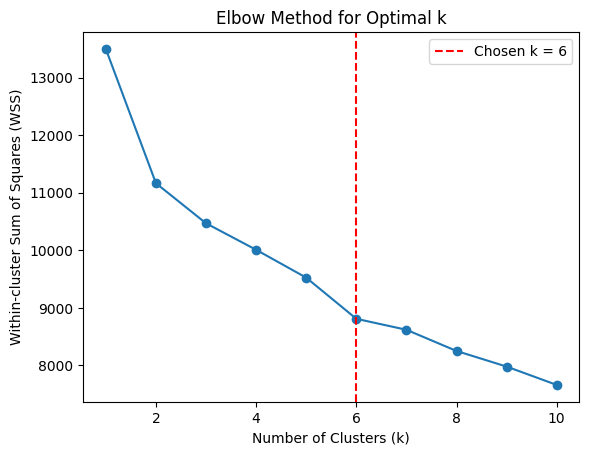

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Dataset/Preprocessed_dataset.csv')

# Select only numeric columns, excluding 'outcome'
numeric_features = df.select_dtypes(include=['number']).drop('outcome', axis=1, errors='ignore')

# Apply scaling to the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)

# Perform k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init='auto'))
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to locate the turning point
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

# Highlight the chosen k with a vertical line
plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


The best number of clusters in a dataset for K-means clustering can be found using the Elbow method. The number of clusters at which adding more clusters does not significantly reduce the inertia is represented by the Elbow point. The inertia measures how compact the clusters are. The Elbow technique aids in striking a balance between preventing overfitting and having a low moment of inertia.

## K=3

In [45]:
#Rana
import numpy as np
from sklearn.cluster import KMeans

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 0.62997426  0.19856305  0.20592258  0.45755057  0.80665345  0.37266307
  -0.0966323  -0.07688164  0.13302548  0.61345781  0.67851245  0.62784023
   0.05412412 -0.26975531  0.64924236]
 [-1.08155242 -0.09977345 -0.02228438 -0.66295439 -0.17516494  0.36708372
   0.21630734  0.22132916  0.11517124  0.12549958  0.04913927 -1.07049852
  -0.03123914  0.27004932 -1.10115009]
 [ 0.62858836 -0.04154915 -0.12378859  0.33470261 -0.39756943 -0.62898857
  -0.14652405 -0.16551317 -0.20875583 -0.55950872 -0.52971182  0.61911326
  -0.00730671 -0.07724947  0.63441286]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 0 1 1 0 1 1 

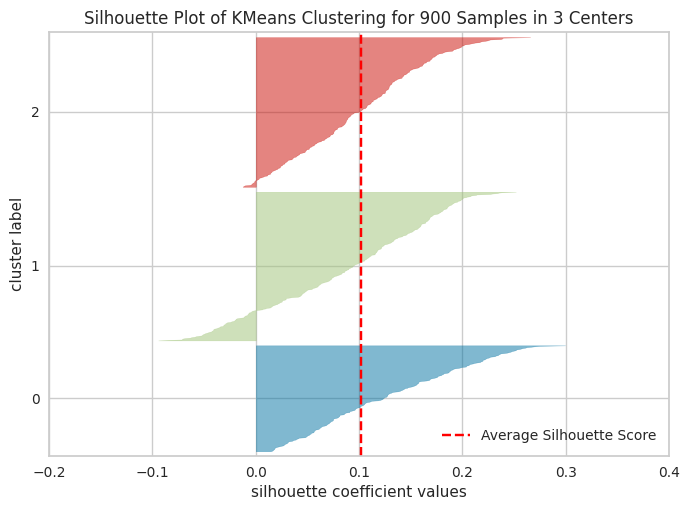

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 900 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib

# to avoid font errors
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Perform silhouette analysis for K-means clustering with K=9
kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering and compute WSS and silhouette score
kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 10446.48671611567
Average Silhouette Score: 0.1016929619176413


The WSS value of 10446.49 indicates a relatively larger cluster spread, suggesting that data points are more dispersed around their centroids.

The Average Silhouette Score of 0.101 indicates poor clustering structure, with weak separation and overlapping clusters.

## K=6

In [36]:


import numpy as np
from sklearn.cluster import KMeans 

# Create a new DataFrame with the scaled features and original non-numeric columns
df_scaled = pd.DataFrame(scaled_features, columns=numeric_features.columns)
# Perform K-means clustering for K=6
kmeans = KMeans(n_clusters=6, random_state=45, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 0.70569571  0.25603983  0.14419357  0.52352552  0.78448732  0.41675951
  -0.19755171 -0.02929333  0.13235225  0.60589714  0.71622245  0.72596904
   0.05285475 -0.24277205  0.73076261]
 [-0.90886435  0.03342752 -0.00655171 -0.67630308  1.12732231  0.62910953
   0.36338394  0.26157155  0.19442075  1.32990379  0.79764256 -0.96489172
  -0.29640849  0.09194779 -0.93471601]
 [-0.90921031 -0.04130151  0.35062292 -0.07415609 -0.85428969  0.52544024
   1.19449235 -0.37739367  0.17780766 -0.86966019  0.85181782 -0.88340683
   0.21827408  0.25726061 -0.90635013]
 [ 0.75173804 -0.10112105 -0.08174781  0.3525147  -0.26677916 -0.63301858
  -0.14661484 -0.15285034  0.24055702 -0.49307557 -0.55794497  0.77673912
   0.10080987 -0.10313113  0.75901818]
 [ 0.39484663 -0.35759576  0.08286357  0.8707138  -0.37614253 -0.6552798
  -0.02702676 -0.06885927 -4.34487053 -0.69991627 -0.03071167  0.5129512
  -0.83369429 -0.02331821  0.38716612]
 [-0.88858427 -0.03884289 -0.22430797 -0.79504022 

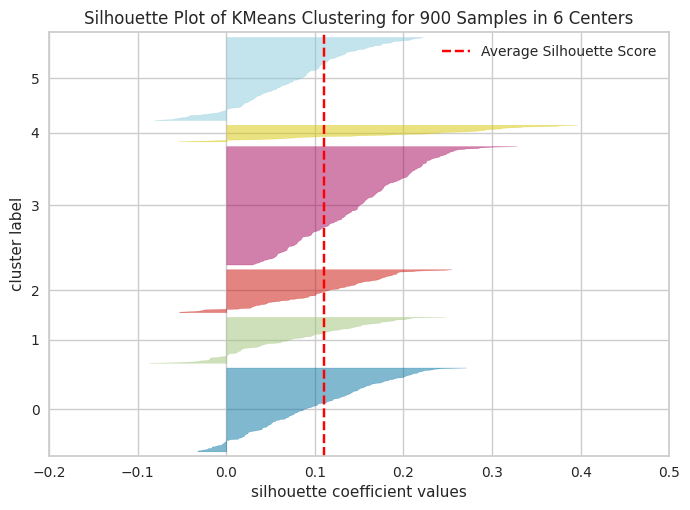

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 900 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib

# to avoid font errors
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Perform silhouette analysis for K-means clustering with K=6
kmeans = KMeans(n_clusters=6, random_state=45, n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering and compute WSS and silhouette score for K=6
kmeans = KMeans(n_clusters=6, random_state=45, n_init='auto')
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


WSS: 8776.722812008877
Average Silhouette Score: 0.11058957961188719


The WSS value of 8776.72 indicates a moderate cluster spread, suggesting that data points are not tightly packed around their centroids.

The Average Silhouette Score of 0.110 suggests weak clustering structure, with potential overlap and less distinct cluster boundaries.

k=2

In [41]:

import numpy as np
from sklearn.cluster import KMeans

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=45, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 0.7020035   0.0311373   0.01764889  0.44268543  0.08462884 -0.21690093
  -0.12921915 -0.12163067 -0.09101137 -0.10244714 -0.02826083  0.71805435
   0.00497105 -0.16840928  0.71596033]
 [-0.9828049  -0.04359222 -0.02470845 -0.6197596  -0.11848038  0.30366131
   0.18090681  0.17028294  0.12741592  0.14342599  0.03956517 -1.00527609
  -0.00695946  0.23577299 -1.00234446]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

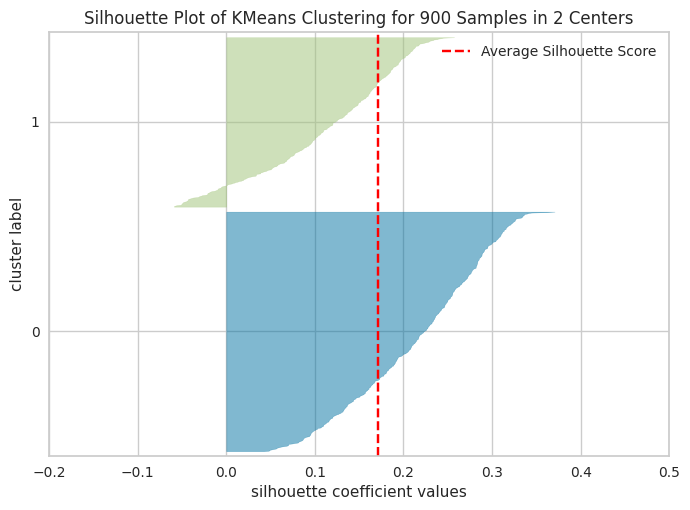

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 900 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib

# to avoid font errors
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Perform silhouette analysis for K-means clustering with K=5
kmeans = KMeans(n_clusters=2, random_state=45, n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering and compute WSS and silhouette score for K=8
kmeans = KMeans(n_clusters=2, random_state=45, n_init='auto')
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


WSS: 11166.539537119663
Average Silhouette Score: 0.17145331666962568


The WSS value of 11166.54 suggests that the clusters are relatively dispersed, with data points spread further from their centroids, indicating less compact clusters.

The average silhouette score of 0.171 suggests a modest level of clustering structure, where clusters may not be well-separated and distinct, implying that some overlap between clusters could be present.

## Evaluate the best models of Clustring:

| Metric                   | K=3                | K=6                | K=2                |
|--------------------------|--------------------|--------------------|--------------------|
| Average Silhouette width | 0.1016929619176413 | 0.11058957961188719|0.17145331666962568 |
| WSS                      | 10446.48671611567  | 8776.722812008877  | 11166.539537119663 |



### Average Silhouette Width:  
The average silhouette width measures how similar a data point is to its own cluster compared to other clusters. Higher values indicate better-defined clusters. The values obtained are:  
- K=3: 0.1017  
- K=6: 0.1106  
- K=2: 0.1715  

The highest average silhouette width is observed for **K=2**, indicating that the data points are better separated into clusters with this configuration. **K=6** has a slightly higher silhouette width than **K=3**, suggesting it may offer slightly better separation between clusters than **K=3**. 



### Within-Cluster Sum of Squares (WSS):  
WSS measures the compactness of clusters, representing the sum of squared distances between each data point and its assigned centroid. Lower values of WSS indicate tighter clusters. The values obtained are:  
- K=3: 10446.487  
- K=6: 8776.723  
- K=2: 11166.540  

The lowest WSS is observed for **K=6**, suggesting more compact clusters compared to other configurations. **K=3** has a higher WSS, indicating that the clusters are more spread out compared to **K=6**, but not as dispersed as **K=2**.


Based on these metrics, 
- **K=2** achieves the highest silhouette width, indicating better-separated clusters, but its WSS is also the highest, meaning the clusters are not as compact.  
- **K=6** achieves the lowest WSS, indicating the most compact clusters, but it has a moderate silhouette width.  
- **K=3** offers a balance between separation and compactness, with a silhouette width lower than **K=2** but a higher WSS than **K=6**.

Choosing the optimal **k** depends on whether you prioritize better separation (higher silhouette width) or tighter clusters (lower WSS). 